In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

# Interestingness

### Interestingness through Market-Basket analysis

Market Basket Analysis is one of the key techniques used by large retailers to uncover associations between items. It works by looking for combinations of items that occur together frequently in transactions.

Association Rules are widely used to analyze retail basket or transaction data, and are intended to identify strong rules discovered in transaction data using measures of interestingness, based on the concept of strong rules.

### Apriori algorithm

The Apriori algorithm generates association rules for a given data set. An association rule implies that if an item A occurs, then item B also occurs with a certain probability. 

The Apriori algorithm generates association rules for a given data set. An association rule implies that if an item A occurs, then item B also occurs with a certain probability. Let's look at an example.

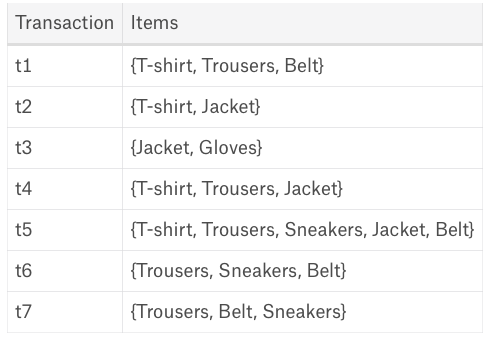

In [43]:
from IPython.display import Image
Image(filename='Images/market_basket.v1.png')

In the table above seven transactions from a clothing store is shown. Each transaction shows items bought in that transaction. We can represent our items as an item set as follows

$$ I = (i_1,i2,..., in) $$

                                        
In this case it will be:

                               
                                {T-shirt,Trousers,Belt,Jacket,Gloves,Sneakers}

A transaction is represented by the following expression:

$$  T = {t_1,i_2,..., t_k} $$

For instance

                                        T = {T-shirt,Trousers,Belt}

Then, an association rule is defined as an implication of the form:

$$ X=>Y, where  X {\subset} Y, Y \subset I and X \cap Y = 0 $$

For instance,
                                   
                                             {T-shirt, Trousers} => {Belt}
                    

## Interestingness Measures

- Support
- Confidence
- Lift
- Conviction

### Support

Support is a measure of how frequently the itemset appears in the dataset.

$$ supp(X=>Y) = \frac{X\cap Y}{n}  $$

In other words, support is the number of transactions with both X and Y divided by the total number of records.

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task1

Calculate the support of the following rules.

</div>

Let's look at some association rules with their supports calculated.

$ supp(Trousers => Jacket) =  \frac{2}{7}$

$ supp(T-shirt => Trousers) = \frac{3}{7}=43\%$

$ supp(Trousers => Belt) = \frac{4}{7}=57\%$

$ supp(T-shirt => Belt) = \frac{2}{7}=28\%$

$ supp(T-shirt,Trousers => Belt ) = \frac{2}{7}=28\%$

### Confidence

In an association rule X => Y, given that X occured, confidence is the frequency of Y happening. Mathematically, it is defined as follows:

$$ conf(X=>Y) = \frac{supp(X,Y)}{supp(X)} $$ 


<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task2

Calculate the confidence of the following rules.

</div>

$ conf(Sneaekrs => T-shirt) =  \frac{\frac{1}{7}}{\frac{4}{7}} = \frac{1}{4}$

$ conf(T-shirt => Jacket) = \frac{\frac{3}{7}}{\frac{4}{7}} = \frac{3}{4}$

$ conf( \{Trousers, Belt\} => Sneakers) = \frac{\frac{3}{7}}{\frac{4}{7}} = \frac{3}{4}$

### Lift

Lift is the ratio of the observed support to that expected if X and Y were independent. Lift is defined as follows:

$$ lift(X=>Y) = \frac{supp(X , Y)}{supp(X)supp(Y)} $$ 

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task3

Calculate the lift of the following rules.

</div>

$ lift(Trousers => Jacket)  = \frac{\frac{2}{7}}{\frac{5}{7}*\frac{4}{7}} = \frac{7}{10} $

$ lift( \{T-shirt,Belt\} => Trousers) = \frac{\frac{2}{7}}{\frac{2}{7}*\frac{5}{7}} = \frac{7}{5}$

$ lift( T-shirt => Sneakers) = \frac{\frac{1}{7}}{\frac{4}{7}*\frac{2}{7}} = \frac{7}{8}$

### Conviction

Conviction can be interpreted as the ratio of the expected frequency that X occurs without Y (that is to say, the frequency that the rule makes an incorrect prediction) if X and Y were independent divided by the observed frequency of incorrect predictions. Mathematically, conviction is defined as follows:

$$ conv(X=>Y) = \frac{1-supp(Y)}{1-conf(X=>Y)}  $$

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task4

Calculate the conviction of the following rules.

</div>

$ conv(Trousers => Jacket) = \frac{1-\frac{4}{7}}{1-\frac{\frac{2}{7}}{\frac{5}{7}}} = \frac{5}{7}$

$ conv( \{T-shirt,Belt\} => Trousers) = \frac{1-\frac{5}{7}}{1-\frac{\frac{2}{7}}{\frac{2}{7}}} = = \frac{1-\frac{5}{7}}{0} = \infty$

$ conv( T-shirt => Sneakers) = \frac{1-\frac{3}{7}}{1-\frac{\frac{1}{7}}{\frac{4}{7}}} = 0.76$

## Analysing interestingness measures on a real-world dataset

The dataset contains 15010 records(transactions) each with four columns. The description of the columns are as follows:

- Date: Indicates date of trasaction (YYYY-MM-DD format). It ranges from 30/10/2016 to 09/04/2017
- Time: Time of transaction (HH:MM:SS format)
- Transaction: Categorical variable which allows to differentiate between transactions. Those rows that share the same transaction code belong to the same transaction. 
- Item: Categorical variables shows items of transactions

In [44]:
data = pd.read_csv('BreadBasket_DMS.csv')

In [45]:
data.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


<AxesSubplot:xlabel='Item'>

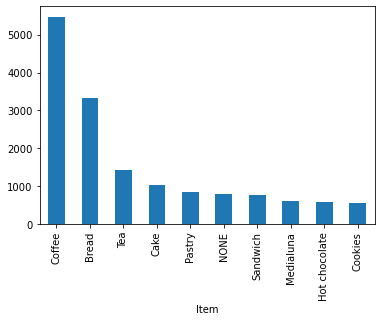

In [46]:
# a)
df = data.groupby('Item')['Transaction'].count()
df.sort_values(ascending=False).iloc[:10].plot.bar()

<AxesSubplot:xlabel='month'>

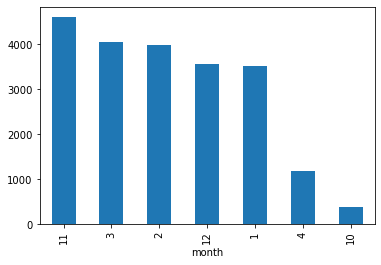

In [47]:
# b)
data['month'] = pd.DatetimeIndex(data['Date']).month
df = data.groupby('month')['Transaction'].count()
df.sort_values(ascending=False).iloc[:10].plot.bar()

<AxesSubplot:xlabel='week'>

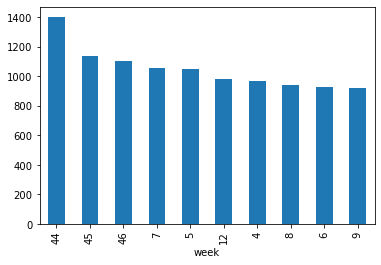

In [48]:
# c)
data['week'] = pd.DatetimeIndex(data['Date']).week
df = data.groupby('week')['Transaction'].count()
df.sort_values(ascending=False).iloc[:10].plot.bar()

<AxesSubplot:xlabel='hour'>

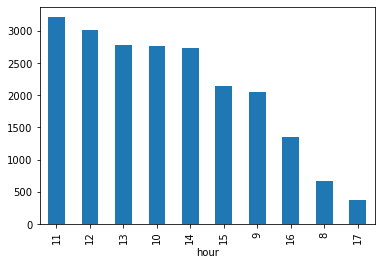

In [49]:
# d)
data['hour'] = pd.DatetimeIndex(data['Time']).hour
df = data.groupby('hour')['Transaction'].count()
df.sort_values(ascending=False).iloc[:10].plot.bar()

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task5

- a) Plot the items against their corresponding frequencies as a bar plot.

- b) Plot number of transactions per month.

- c) Plot number of transactions per weekday.

- d) Plot number of transactions per hour.

</div>

## Apriori Algorithm

Apriori is an algorithm for frequent item set mining and association rule learning over transactional databases. It proceeds by identifying the frequent individual items in the database and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the database.

1- Create a frequency table of all the items that occur in all the transactions. 

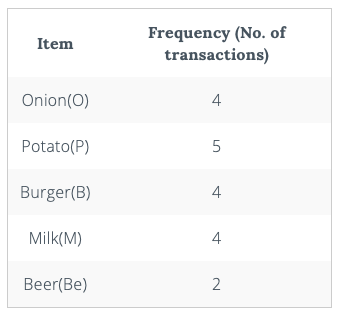

In [50]:
Image(filename='Images/Apriori.v1.png')

2- We know that only those elements are significant for which the support is greater than or equal to the threshold support.Here, support threshold is 50%, hence only those items are significant which occur in more than three transactions and such items are Onion(O), Potato(P), Burger(B), and Milk(M). Therefore, we are left with:

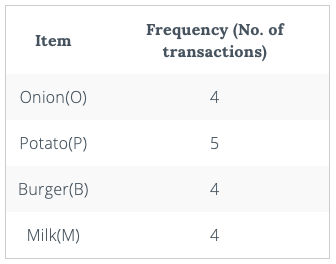

In [51]:
Image(filename='Images/Apriori.v2.png')

3- The next step is to make all the possible pairs of the significant items keeping in mind that the order doesn’t matter, i.e., AB is same as BA. To do this, take the first item and pair it with all the others such as OP, OB, OM. Similarly, consider the second item and pair it with preceding items, i.e., PB, PM. We are only considering the preceding items because PO (same as OP) already exists. So, all the pairs in our example are OP, OB, OM, PB, PM, BM.

4- We will now count the occurrences of each pair in all the transactions.

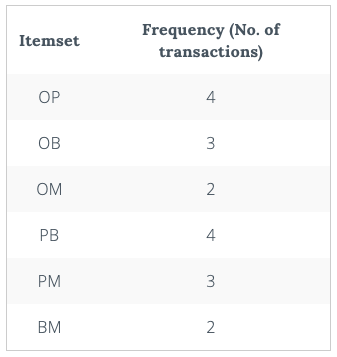

In [52]:
Image(filename='Images/Apriori.v4.png')

5- Again only those itemsets are significant which cross the support threshold, and those are OP, OB, PB, and PM.

6- Now let’s say we would like to look for a set of three items that are purchased together. We will use the itemsets found in step 5 and create a set of 3 items.

To create a set of 3 items another rule, called self-join is required. It says that from the item pairs OP, OB, PB and PM we look for two pairs with the identical first letter and so we get

OP and OB, this gives OPB
PB and PM, this gives PBM
Next, we find the frequency for these two itemsets.

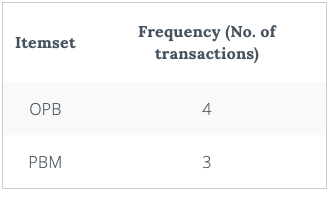

In [53]:
Image(filename='Images/Apriori.v6.png')

## Python apriori library 

In [54]:
from  efficient_apriori import apriori

In [55]:
data_itemset = data.groupby('Transaction')['Item'].apply(pd.Series.tolist).tolist()

In [56]:
data_itemset

[['Bread'],
 ['Scandinavian', 'Scandinavian'],
 ['Hot chocolate', 'Jam', 'Cookies'],
 ['Muffin'],
 ['Coffee', 'Pastry', 'Bread'],
 ['Medialuna', 'Pastry', 'Muffin'],
 ['Medialuna', 'Pastry', 'Coffee', 'Tea'],
 ['Pastry', 'Bread'],
 ['Bread', 'Muffin'],
 ['Scandinavian', 'Medialuna'],
 ['Bread', 'Medialuna', 'Bread', 'NONE'],
 ['Jam', 'Coffee', 'Tartine', 'Pastry', 'Tea'],
 ['Basket', 'Bread', 'Coffee'],
 ['Bread', 'Medialuna', 'Pastry'],
 ['NONE', 'NONE', 'Mineral water', 'Scandinavian'],
 ['Bread', 'Medialuna', 'Coffee'],
 ['Hot chocolate'],
 ['Farm House'],
 ['Farm House', 'Bread'],
 ['Bread', 'Medialuna'],
 ['Coffee', 'Coffee', 'Medialuna', 'Bread'],
 ['Jam'],
 ['Scandinavian', 'Muffin'],
 ['Bread'],
 ['Scandinavian'],
 ['Fudge'],
 ['Scandinavian'],
 ['Coffee', 'Bread'],
 ['Bread', 'Jam', 'NONE'],
 ['Bread'],
 ['Basket'],
 ['Scandinavian', 'Muffin'],
 ['Coffee'],
 ['Coffee', 'Muffin'],
 ['Muffin', 'Scandinavian'],
 ['Tea', 'Bread'],
 ['Coffee', 'Bread', 'NONE'],
 ['Bread', 'Tea'],
 

In [57]:
for i in range(len(data_itemset)):
    data_itemset[i] = tuple(data_itemset[i])

In [58]:
itemsets, rules = apriori(data_itemset[0:], min_support=.01,  min_confidence=.1)

In [59]:
len(rules)

42

In [60]:
rules

[{Coffee} -> {Bread},
 {Bread} -> {Coffee},
 {Pastry} -> {Bread},
 {Pastry} -> {Coffee},
 {Medialuna} -> {Coffee},
 {Tea} -> {Coffee},
 {Coffee} -> {Tea},
 {Medialuna} -> {Bread},
 {NONE} -> {Bread},
 {Muffin} -> {Coffee},
 {Tea} -> {Bread},
 {NONE} -> {Coffee},
 {Juice} -> {Coffee},
 {Hot chocolate} -> {Coffee},
 {Tea} -> {NONE},
 {NONE} -> {Tea},
 {Cookies} -> {Coffee},
 {Coffee} -> {Cake},
 {Cake} -> {Coffee},
 {Tea} -> {Cake},
 {Cake} -> {Tea},
 {Soup} -> {Coffee},
 {Tea} -> {Sandwich},
 {Sandwich} -> {Tea},
 {Cookies} -> {Bread},
 {Hot chocolate} -> {Bread},
 {Sandwich} -> {Bread},
 {Cake} -> {Bread},
 {Alfajores} -> {Coffee},
 {Sandwich} -> {Coffee},
 {Hot chocolate} -> {Cake},
 {Cake} -> {Hot chocolate},
 {Alfajores} -> {Bread},
 {Brownie} -> {Coffee},
 {Brownie} -> {Bread},
 {Scone} -> {Coffee},
 {Toast} -> {Coffee},
 {Spanish Brunch} -> {Coffee},
 {Coffee, Pastry} -> {Bread},
 {Bread, Pastry} -> {Coffee},
 {Bread, Coffee} -> {Pastry},
 {Pastry} -> {Bread, Coffee}]

In [61]:
itemsets

{1: {('Bread',): 3097,
  ('Scandinavian',): 275,
  ('Jam',): 142,
  ('Cookies',): 515,
  ('Hot chocolate',): 552,
  ('Muffin',): 364,
  ('Coffee',): 4528,
  ('Pastry',): 815,
  ('Medialuna',): 585,
  ('Tea',): 1350,
  ('NONE',): 753,
  ('Mineral water',): 134,
  ('Farm House',): 371,
  ('Fudge',): 142,
  ('Juice',): 365,
  ('Hearty & Seasonal',): 100,
  ('Soup',): 326,
  ('Cake',): 983,
  ('Coke',): 184,
  ('Sandwich',): 680,
  ('Alfajores',): 344,
  ('Brownie',): 379,
  ('Truffles',): 192,
  ('Jammie Dodgers',): 125,
  ('Tiffin',): 146,
  ('Toast',): 318,
  ('Scone',): 327,
  ('Salad',): 99,
  ('Chicken Stew',): 123,
  ('Spanish Brunch',): 172,
  ('Baguette',): 152},
 2: {('Bread', 'Coffee'): 852,
  ('Bread', 'Pastry'): 276,
  ('Coffee', 'Pastry'): 450,
  ('Coffee', 'Medialuna'): 333,
  ('Coffee', 'Tea'): 472,
  ('Bread', 'Medialuna'): 160,
  ('Bread', 'NONE'): 196,
  ('Coffee', 'Muffin'): 178,
  ('Bread', 'Tea'): 266,
  ('Coffee', 'NONE'): 401,
  ('Coffee', 'Juice'): 195,
  ('Coffee'

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task6

- Run apriori algorithm for different min_support and a fixed min_confidence and plot a graph with x axis min_support and y-axis to be the number of rules generated.


- Run apriori algorithm for different min_confidence and a fixed min_support and plot a graph with x axis min_support and y-axis to be the number of rules generated.

</div>

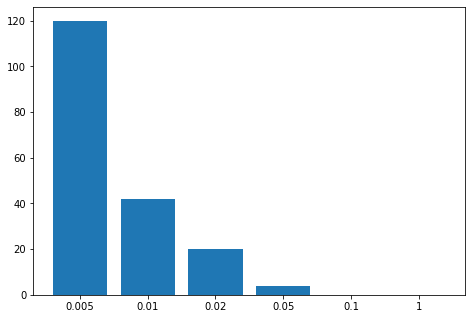

In [62]:
content = {}
for supp in [0.005, 0.01, 0.02, 0.05, 0.1, 1]:
    itemsets, rules = apriori(data_itemset[0:], min_support=supp,  min_confidence=.1)
    content.update({supp:len(rules)})

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar([str(x) for x in content.keys()],content.values())
plt.show()

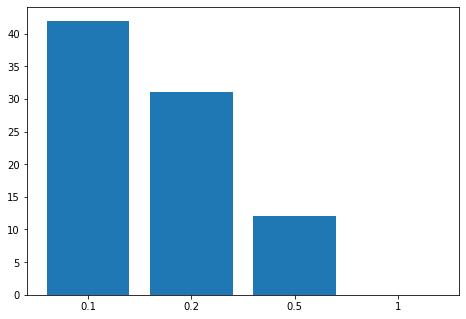

In [63]:
content = {}
for conf in [0.1, 0.2, 0.5, 1,]:
    itemsets, rules = apriori(data_itemset[0:], min_support=0.01,  min_confidence=conf)
    content.update({conf:len(rules)})

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar([str(x) for x in content.keys()],content.values())
plt.show()

In [64]:
def draw_graph(rules, rules_to_show):
  import networkx as nx  
  G1 = nx.DiGraph()
   
  color_map=[]
  N = 50
  colors = np.random.rand(N)    
  strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']   
   
   
  for i in range (rules_to_show):      
    G1.add_nodes_from(["R"+str(i)])
    
     
    for a in rules[i].lhs:
                
        G1.add_nodes_from([a])
        
        G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
       
    for c in rules[i].rhs:
             
#             G1.add_nodes_from(c)
            
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)
 
  for node in G1:
       found_a_string = False
       for item in strs: 
           if node==item:
                found_a_string = True
       if found_a_string:
            color_map.append('yellow')
       else:
            color_map.append('green')  
  edges = G1.edges()
  colors = [G1[u][v]['color'] for u,v in edges]
  weights = [G1[u][v]['weight'] for u,v in edges]
 
  pos = nx.spring_layout(G1, k=16, scale=1)
  nx.draw(G1, pos, edges=edges, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            
#   nx.draw(G1)
  for p in pos:  # raise text positions
           pos[p][1] += 0.07
  nx.draw_networkx_labels(G1, pos)
  plt.show()

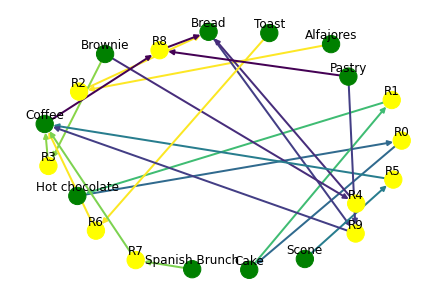

In [65]:
itemsets, rules = apriori(data_itemset[0:], min_support=0.01,  min_confidence=0.1)
draw_graph (rules[30:40], 10)


<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task7

Draw a graph that shows a consequence at center of the graph and precedence for each rule around it.

More concretely consider consequence to be "Tea" and use rules with only one precedence and choose at most 12 rules.

It should be something like the following graph but for "Tea" as a consequence.


</div>

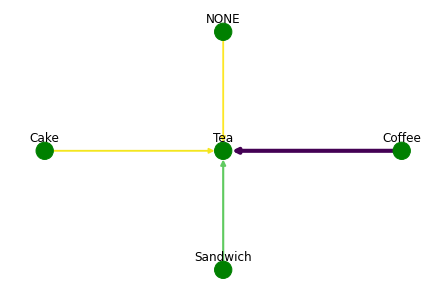

In [66]:
def draw_con_graph(rules, target:str):
    "Draws a graph that shows a consequence at center of the graph and precedence for each rule around it"
    import networkx as nx
    from math import cos, sin, pi
    G1 = nx.DiGraph()
   
    target_rules = [rule for rule in rules if rule.rhs[0] == target]
    target_rules = target_rules if 12 <= len(target_rules) else target_rules[:12] #"at most 12 rules"
    G1.add_node(target, name=target)
    G1.add_nodes_from([rule.lhs[0] for rule in target_rules])
    for rule in target_rules:
        G1.add_edge(rule.lhs[0], target, color=rule.lift, weight=3/rule.lift)
 
    color_map=[]
    for node in G1:
        color_map.append('green')
        
    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]
 
    pos = {rule.lhs[0]:[cos(2*pi*i/len(target_rules)),sin(2*pi*i/len(target_rules))] for i,rule in enumerate(target_rules)}
    pos.update({target:[0,0]})
    nx.draw(G1, pos, edges=edges, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            
    
    for p in pos:  # raise text positions
        pos[p][1] += 0.11
    
    nx.draw_networkx_labels(G1, pos)
    plt.show()

draw_con_graph (rules, "Tea")

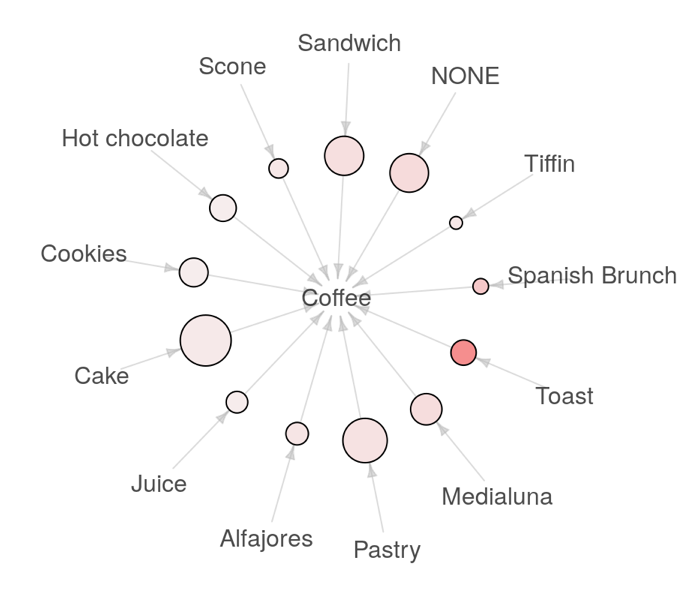

In [67]:
Image(filename='Images/Graph.png')

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task8

In the default credit dataset try to find the followings.

- Find a concise pattern.
- Find a general pattern.
- Find a peculiar pattern.

Use the definition of conciseness, generality and peculiarity from the following paper.

https://www.researchgate.net/publication/220566216_Interestingness_Measures_for_Data_Mining_A_Survey

</div>

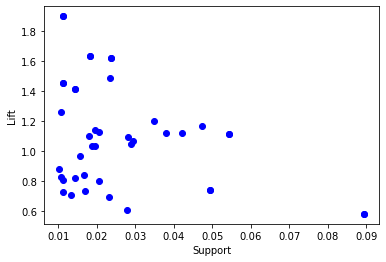

Pattern: {Hot chocolate} -> {Cake} (conf: 0.196, supp: 0.011, lift: 1.897, conv: 1.115)


In [73]:
## Concise Pattern: 
#    -  A pattern is concise if it contains relatively few attribute-value pairs,while a set of patterns is concise if it contains relatively few patterns.
#    - A simple pattern (not complex)
#    - Patterns:
#         Coffee} -> Bread
#         Bread} -> Coffee
#         Pastry} -> Bread
#         Pastry} -> Coffee

## General pattern:
#    - A pattern is general if it covers a relatively large subset of a dataset.
#    - The obvious object
#    - Patterns:
#        Bread -> Coffee
    
## Peculiar pattern:
#    - A pattern is peculiar if it is far away from other discovered patterns according to some distance measure (outlier)
#    - The odd object
#    - Patterns:

from math import sqrt
plt.plot([r.support for r in rules], [r.lift for r in rules],'bo')
plt.xlabel('Support')
plt.ylabel('Lift')
plt.show()


distance = lambda rule: sqrt(rule.support*rule.support + rule.lift*rule.lift)
rules.sort(key=distance)
print(f'Pattern: {rules[-1]}')

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task9

How is entrooy related to frequncy of itermsets? explain.

To get help, refer to the following paper.

https://www.researchgate.net/publication/221653139_Finding_low-entropy_sets_and_trees_from_binary_data/link/5414967d0cf2bb7347db32fa/download

</div>

* Entropy function is decreasing with respect to itemset inclusion
* High frequency implies low entropy, but not necessarily vice versa

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task10 (Arbitrary to get extra scores)

Implement a model for finding frequent patterns (itemsets) using the concept of entropy.


</div>